Import images and libraries


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans

In [2]:
img2_path = "..\B20ME027\Images\image2.jpg"
img2 = cv2.imread(img2_path, cv2.COLOR_BGR2RGB)
img1_path = "..\B20ME027\Images\image1.jpg"
img1 = cv2.imread(img1_path, cv2.COLOR_BGR2RGB)

In [3]:
img1 = cv2.resize(img1,(64,64))
img2 = cv2.resize(img2,(64,64))

Ratio Cut 


In [8]:

def get_neighbours(index,cols,flat_image,lamda,sigma):
    i,j = index//cols,index%cols
    neighbours = []
    weights = []
    for x in range(flat_image.shape[0]):
        i1,j1 = x//cols,x%cols
        if i1==i and j1==j:
            continue
        dij = np.sqrt((i-i1)**2 + (j-j1)**2)
        neighbours.append(x)
        wij = np.exp(-(((flat_image[index]-flat_image[x])**2) +lamda*(dij**2))/sigma**2)
        weights.append(wij)
    return neighbours, weights

def compute_adjacency_matrix(image, sig_I, sig_d):
    flat_image = image.flatten()
    rows, cols = image.shape
    adjacency_matrix = np.zeros((rows * cols, rows * cols))
    for i in range(flat_image.shape[0]):
        neighbours, weights = get_neighbours(i, cols, flat_image, sig_I, sig_d)
        for j in range(len(neighbours)):
            adjacency_matrix[i, neighbours[j]] = weights[j]
            adjacency_matrix[neighbours[j], i] = weights[j]
    return adjacency_matrix

def compute_degree_matrix(adjacency_matrix):
    degree_matrix = np.zeros((adjacency_matrix.shape[0],adjacency_matrix.shape[1]))
    for i in range(adjacency_matrix.shape[0]):
        degree_matrix[i,i] = np.sum(adjacency_matrix[i])
    return degree_matrix

def compute_laplacian_matrix(adjacency_matrix,degree_matrix):
    laplacian_matrix = degree_matrix - adjacency_matrix
    return laplacian_matrix

def ratio_cut_clustering(image, lamda, sigma,k):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    adjacency_matrix = compute_adjacency_matrix(image, lamda, sigma)
    degree_matrix = compute_degree_matrix(adjacency_matrix)
    laplacian_matrix = compute_laplacian_matrix(adjacency_matrix, degree_matrix)
    eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    k_eig_vecs = eigenvectors[:, np.argsort(eigenvalues)[:k]]

    kmeans = KMeans(n_clusters=k).fit(k_eig_vecs)
    labels = kmeans.labels_

    
    segmented_image = np.reshape(labels, img1.shape[:2])

    return segmented_image
    


K=3

C:\Users\gorka\AppData\Local\Temp/ipykernel_45964/353949274.py:11: RuntimeWarning: overflow encountered in scalar subtract
  wij = np.exp(-(((flat_image[index]-flat_image[x])**2) +lamda*(dij**2))/sigma**2)


Ratio Cut segmentation with lambda=6, sigma=30 and k=3


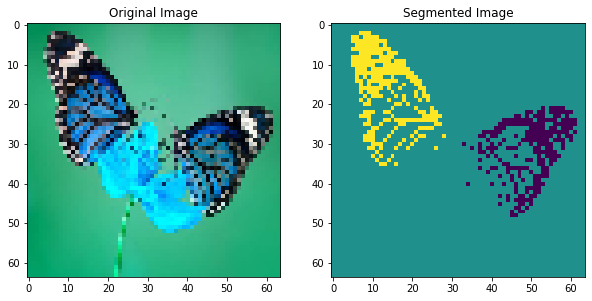

In [9]:
lam = 6
sig = 30
k=3
rc_segmented_img2 = ratio_cut_clustering(img2, lam, sig, k)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
print(f"Ratio Cut segmentation with lambda={lam}, sigma={sig} and k={k}") 
axs[0].imshow(img2)
axs[0].set_title('Original Image')
axs[1].imshow(rc_segmented_img2)
axs[1].set_title('Segmented Image')
plt.show()

C:\Users\gorka\AppData\Local\Temp/ipykernel_25324/3902325667.py:12: RuntimeWarning: overflow encountered in scalar subtract
  wij = np.exp(-(((flat_image[index]-flat_image[x])**2) +lamda*(dij**2))/sigma**2)


Ratio Cut segmentation with lambda=2, sigma=47 and k=3


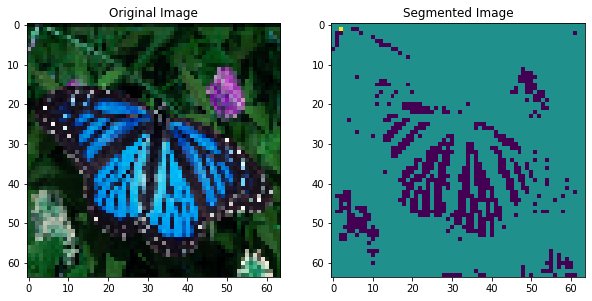

In [17]:
lamda = 2
sigma = 47
k=3
rc_segmented_img1 = ratio_cut_clustering(img1, lamda,sigma, k)
print(f"Ratio Cut segmentation with lambda={lamda}, sigma={sigma} and k={k}") 

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img1)
axs[0].set_title('Original Image')
axs[1].imshow(rc_segmented_img1)
axs[1].set_title('Segmented Image')
plt.show()

K=6

C:\Users\gorka\AppData\Local\Temp/ipykernel_25324/3902325667.py:12: RuntimeWarning: overflow encountered in scalar subtract
  wij = np.exp(-(((flat_image[index]-flat_image[x])**2) +lamda*(dij**2))/sigma**2)


Ratio Cut segmentation with lambda=2, sigma=47 and k=6


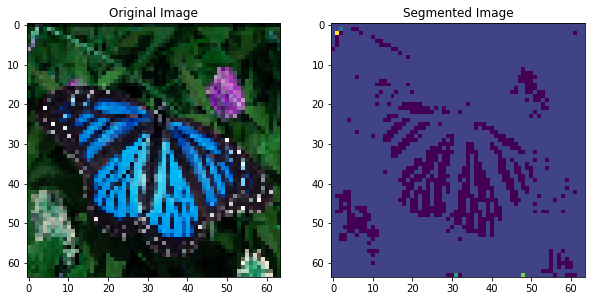

In [19]:
lam = 2
sig = 47
k=6
rc_segmented_img1 = ratio_cut_clustering(img1, lam, sig, k)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
print(f"Ratio Cut segmentation with lambda={lam}, sigma={sig} and k={k}") 
axs[0].imshow(img1)
axs[0].set_title('Original Image')
axs[1].imshow(rc_segmented_img1)
axs[1].set_title('Segmented Image')
plt.show()

C:\Users\gorka\AppData\Local\Temp/ipykernel_32984/3902325667.py:12: RuntimeWarning: overflow encountered in scalar subtract
  wij = np.exp(-(((flat_image[index]-flat_image[x])**2) +lamda*(dij**2))/sigma**2)


Ratio Cut segmentation with lambda=6, sigma=30 and k=6


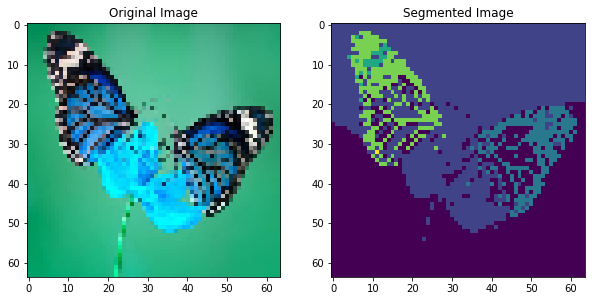

In [ ]:
lam = 6
sig = 30
k=6
rc_segmented_img2 = ratio_cut_clustering(img2, lam, sig, k)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
print(f"Ratio Cut segmentation with lambda={lam}, sigma={sig} and k={k}") 
axs[0].imshow(img1)
axs[0].set_title('Original Image')
axs[1].imshow(rc_segmented_img2)
axs[1].set_title('Segmented Image')
plt.show()

In [81]:
def kmeans_segmentation(image, k):
    image_rgb = image.reshape(-1, 3)

    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(image_rgb)

    segmented_image = labels.reshape(image.shape[:2])

    return segmented_image, kmeans.cluster_centers_

def display_kmeans_segmentation(image,k):
    image = image / 255.0
    segmented_image, centroids = kmeans_segmentation(image, k=k)

    fig, axs = plt.subplots(1, 2, figsize=(10, 10))
    
    print(f'KMeans Segmentation with k={k}')
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[1].imshow(segmented_image)
    axs[1].set_title('Segmented Image')
    plt.show()


In [82]:
display_kmeans_segmentation(img1,3)

KMeans Segmentation with k=3


In [83]:
display_kmeans_segmentation(img2,3)

KMeans Segmentation with k=3


KMeans Segmentation with k=6


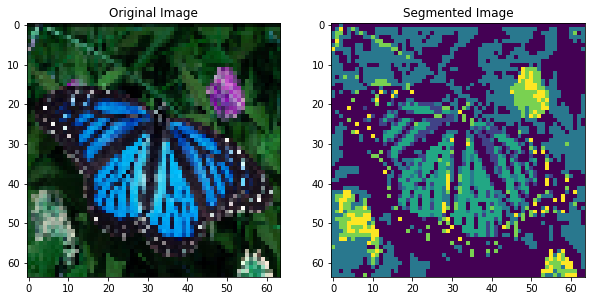

In [102]:
display_kmeans_segmentation(img1,6)


KMeans Segmentation with k=6


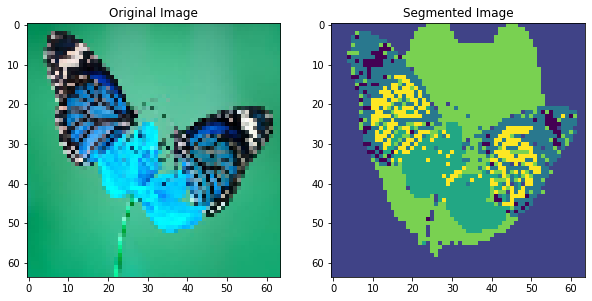

In [103]:
display_kmeans_segmentation(img2,6)